Подсчёт фигур

In [1]:
from matplotlib import pyplot as plt

Делаем рисунок

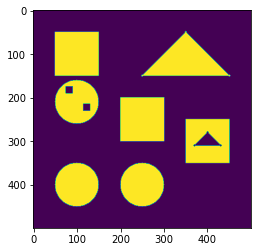

In [2]:
import cv2
import numpy as np

# Создаем пустое бинарное изображение
image = np.zeros((500, 500), dtype=np.uint8)

# Рисуем квадраты
cv2.rectangle(image, (50, 50), (150, 150), 255, -1)
cv2.rectangle(image, (200, 200), (300, 300), 255, -1)

# Рисуем круги
cv2.circle(image, (100, 400), 50, 255, -1)
cv2.circle(image, (250, 400), 50, 255, -1)

# Рисуем треугольник
pt1 = (350,50)
pt2 = (450,150)
pt3 = (250,150)
cv2.circle(image, pt1, 2, 255, -1)
cv2.circle(image, pt2, 2, 255, -1)
cv2.circle(image, pt3, 2, 255, -1)
triangle_cnt = np.array( [pt1, pt2, pt3] )
cv2.drawContours(image, [triangle_cnt], 0, 255, -1)

# Рисуем квадрат с треугольной дыркой
cv2.rectangle(image, (350, 250), (450, 350), 255, -1)
pt1 = (370,310)
pt2 = (430,310)
pt3 = (400,280)
cv2.circle(image, pt1, 2, 0, -1)
cv2.circle(image, pt2, 2, 0, -1)
cv2.circle(image, pt3, 2, 0, -1)
triangle_cnt = np.array( [pt1, pt2, pt3] )
cv2.drawContours(image, [triangle_cnt], 0, 0, -1)

# Рисуем круги с квадратными дырками
cv2.circle(image, (100, 210), 50, 255, -1)
cv2.rectangle(image, (75, 175), (90, 190), 0, -1)
cv2.rectangle(image, (75+40, 175+40), (90+40, 190+40), 0, -1)

# Отображаем изображение
plt.imshow(image);


In [3]:
labels = np.zeros((500, 500), dtype=np.uint8)

In [4]:
k, labels1 = cv2.connectedComponents(image, labels)

In [5]:
labels1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

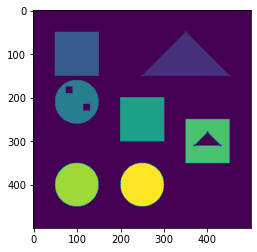

In [6]:
plt.imshow(labels1);

In [7]:
np.unique(labels1)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

Изолируем компоненты

In [8]:
cmpnts = []
for i in range(1,8):
    cmpnt = labels1.copy()
    cmpnt[cmpnt!=i] = 0
    cmpnts.append(cmpnt)

In [23]:
def is_rectangle(img):
    # индексы точек фигуры
    idxs = np.where(img!=0)
    # максимальное значение по y
    ymax = np.max(idxs[1])
    # если оно достигается много раз, то прямоугольник
    return len( idxs[1][idxs[1]==ymax]) > 5

def is_triangle(img):
    
    # индексы точек фигуры
    idxs = np.where(img!=0)
    # минимальное значение по y
    ymin = np.min(idxs[1])
    x_idx1 = idxs[0][idxs[1] == ymin + 2]
    x_idx2 = idxs[0][idxs[1] == ymin + 5]
    
    # Если при небольшом движении вверх от минимального значения точек меньше, то
    # треугольник
    return len(x_idx1) >= len(x_idx2)

def is_circle(img):
    if (is_rectangle(img) or is_triangle(img)):
        return False
    else:
        return True

Считаем фигуры

In [18]:
rect_idx = []
triangle_idx = []
circle_idx = []
for i, cmpnt in enumerate(cmpnts):
    if is_rectangle(cmpnt):
        rect_idx.append(i)
    elif is_triangle(cmpnt):
        triangle_idx.append(i)
    elif is_circle(cmpnt):
        circle_idx.append(i)
    

In [19]:
rect_idx, triangle_idx, circle_idx

([1, 3, 4], [0], [2, 5, 6])

Проверим есть ли в них дырки

In [20]:
# Меняем 255 и 0 местами в бинарном изображении
for i in range(len(cmpnts)):
    cmpnts[i] = np.array( (255*cmpnts[i]/(i+1) + 255 ) % 510, dtype=np.uint8)

In [21]:
rect_with_holes = []
circles_with_holes = []
labelsl = []
for i in rect_idx:
    k, labels2 = cv2.connectedComponents(cmpnts[i], labels)
    labelsl.append(labels2)
    if (k>2):
        rect_with_holes.append(i)
        rect_idx.remove(i)
        
for i in circle_idx:
    k, labels2 = cv2.connectedComponents(cmpnts[i], labels)
    labelsl.append(labels2)
    if (k>2):
        circles_with_holes.append(i)
        circle_idx.remove(i)
    

In [22]:
# Итого
print("Квадратов без дырок: ", len(rect_idx))
print("Кругов без дырок: ", len(circle_idx))
print("Квадратов с дырками: ", len(rect_with_holes))
print("Кругов с дырками: ", len(circles_with_holes))
print("Треугольников: ", len(triangle_idx))

Квадратов без дырок:  2
Кругов без дырок:  2
Квадратов с дырками:  1
Кругов с дырками:  1
Треугольников:  1


Отрисовка для проверки

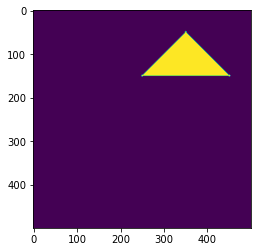

In [30]:
plt.imshow(255-cmpnts[0]);

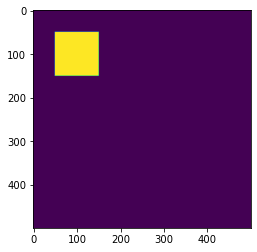

In [31]:
plt.imshow(255-cmpnts[1]);

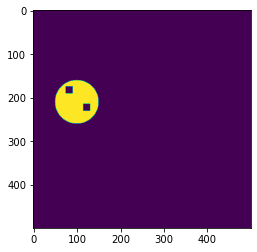

In [32]:
plt.imshow(255-cmpnts[2]);

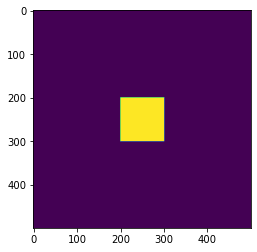

In [33]:
plt.imshow(255-cmpnts[3]);

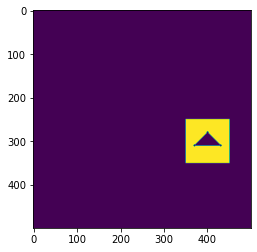

In [34]:
plt.imshow(255-cmpnts[4]);

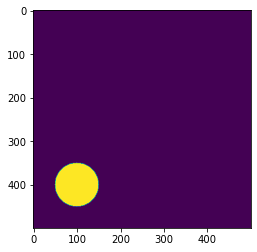

In [35]:
plt.imshow(255-cmpnts[5]);